In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [179]:
dados_ml= pd.read_excel('dados_ml_balanceado_totaltt.xlsx', sheet_name= 'Plan1')

# Definição de variáveis

In [181]:
y = dados_ml['fx_desemp']

In [182]:
x1 = dados_ml[['150m', 'tipinstitu','gen','origcapital', 'capitaberto', 'setor', 'anos de operação no Brasil', 'totempr', 'prevquadro', 'rotgeral', 'clt', 'tempempr', 'cargo', 'fxsalarial', 'loctrab', 'sexo', 'retnaemp', 'escolaridade', 'meb', 'mci', 'mpa', 'msd', 'mri', 'mgc', 'mpo', 'mqvt', 'medc', 'mlid', 'mrec', 'mestr', 'rot_vol', 'categ_futnaemp']]

In [183]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.20, 
                                                    random_state=101)

# Modelo para retenção de talentos (Randon Forest)

In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
rfc = RandomForestClassifier(n_estimators=700)
rfc.fit(x1_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [185]:
rfc_pred = rfc.predict(x1_test)

In [186]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           1       0.88      0.65      0.75      8539
           2       0.72      0.91      0.80      8449

   micro avg       0.78      0.78      0.78     16988
   macro avg       0.80      0.78      0.78     16988
weighted avg       0.80      0.78      0.78     16988



In [187]:
taxa_acerto = accuracy_score(y_test, rfc_pred)

In [188]:
taxa_acerto

0.778843889804568

In [189]:
predictions = rfc.predict_proba(x1_test)

In [190]:
naot= 'Não é talento'
simt= 'É talento'

In [191]:
predictions = pd.DataFrame(predictions, columns= (naot, simt)).round(2)

In [192]:
gp= ['grupo previsto']
rfc_predbd = pd.DataFrame(rfc_pred, columns= gp)

In [193]:
y_testbd= pd.DataFrame(y_test)

In [194]:
final=pd.concat([x1_test.reset_index(), y_test.reset_index(), predictions], axis=1)

In [195]:
final.head()

,index,150m,tipinstitu,gen,origcapital,capitaberto,setor,anos de operação no Brasil,totempr,prevquadro,...,medc,mlid,mrec,mestr,rot_vol,categ_futnaemp,index,fx_desemp,Não é talento,É talento
0,48271,1,1,1,2,1,5,17,2,1,...,4.714286,4.7,4.75,4.75,2.258469,4,48271,2,0.38,0.62
1,52661,2,2,1,2,1,4,28,3,1,...,5.000000,4.9,4.00,4.50,3.461538,4,52661,2,0.30,0.70
2,2257,2,2,3,2,2,4,119,4,1,...,5.000000,5.0,5.00,4.50,1.061045,4,2257,1,0.67,0.33
3,60982,2,2,1,2,2,4,56,4,2,...,3.714286,3.2,3.25,3.50,1.826251,4,60982,2,0.41,0.59
4,10602,1,2,2,2,1,5,21,3,1,...,4.285714,4.6,4.75,4.75,13.578565,3,10602,1,1.00,0.00


In [196]:
final['prob_sertalento']= predictions['É talento']

In [197]:
finaltempo= final['prob_sertalento']

In [198]:
def tempo_talento (finaltempo):
    if finaltempo > 0.90:
        return'+- 1 ano'
    elif finaltempo > 0.70:
        return '+- 2 anos'
    elif finaltempo > 0.50:
        return '+- 3 anos'
    else:
        return 'Acima de 4 anos'

In [199]:
final['tempo_talento']= list(map(tempo_talento,finaltempo))

In [200]:
final= final.sort_values(by='tempo_talento')

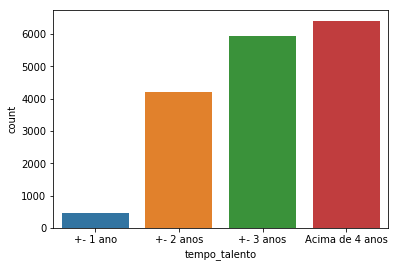

In [201]:
sns.countplot(x='tempo_talento',data= final)

In [202]:
categfut= final['categ_futnaemp']

In [203]:
def futnaemp (categfut):
    if categfut == 1:
        return'Por menos de 1 ano'
    elif categfut == 2:
        return 'Entre 1 a 3 anos'
    elif categfut == 3:
        return 'Entre 3 e 5 anos'
    elif categfut == 4:
        return 'Entre 5 e 10 anos'
    elif categfut == 5:
        return 'Acima de 10 anos'
    elif categfut == 6:
        return 'Gostaria de me aposentar aqui'

In [204]:
final['Futuro na empresa']= list(map(futnaemp,categfut))

In [205]:
interval = (final['prob_sertalento'] > 0.7)
final_intervalcritic = final.loc[interval]

C:\Users\silva\Anaconda3\lib\site-packages\seaborn\categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


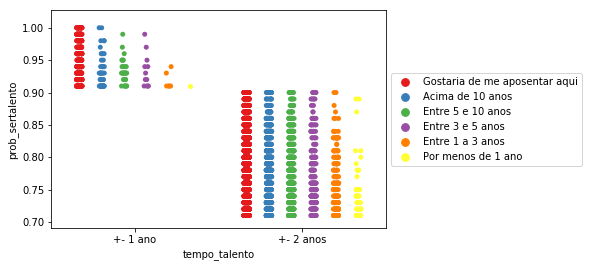

In [208]:
sns.stripplot(x="tempo_talento", y="prob_sertalento", data=final_intervalcritic,jitter=True,hue='Futuro na empresa',palette='Set1',split=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [277]:
interval1 = (final['prob_sertalento'] > 0.7) & (final['Futuro na empresa'] == 'Por menos de 1 ano')
final_intervalcriticesp = final.loc[interval]

In [278]:
interval1 = final['Futuro na empresa'] == 'Por menos de 1 ano'
interval2= final['Futuro na empresa'] == 'Entre 1 a 3 anos'
interval= interval1+interval2
final_intervalcriticesp = final.loc[interval]

C:\Users\silva\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [281]:
final_intervalcriticesp

,index,150m,tipinstitu,gen,origcapital,capitaberto,setor,anos de operação no Brasil,totempr,prevquadro,...,mestr,rot_vol,categ_futnaemp,index,fx_desemp,Não é talento,É talento,prob_sertalento,tempo_talento,Futuro na empresa
277,54708,2,2,2,2,1,1,51,4,1,...,5.00,3.877684,2,54708,2,0.06,0.94,0.94,+- 1 ano,Entre 1 a 3 anos
10366,59789,1,2,2,2,1,5,17,3,1,...,5.00,9.000900,2,59789,2,0.09,0.91,0.91,+- 1 ano,Entre 1 a 3 anos
12378,53253,2,2,3,2,1,4,28,3,1,...,5.00,3.461538,2,53253,2,0.09,0.91,0.91,+- 1 ano,Entre 1 a 3 anos
14015,74698,1,2,2,2,1,4,13,1,2,...,5.00,1.831502,2,74698,2,0.07,0.93,0.93,+- 1 ano,Entre 1 a 3 anos
4317,52956,2,2,1,2,1,4,28,3,1,...,5.00,3.461538,2,52956,2,0.09,0.91,0.91,+- 1 ano,Entre 1 a 3 anos
16901,68591,2,2,1,1,2,4,61,4,2,...,5.00,5.060707,2,68591,2,0.09,0.91,0.91,+- 1 ano,Entre 1 a 3 anos
12978,46368,2,2,1,1,1,4,41,3,1,...,5.00,1.333333,1,46368,2,0.09,0.91,0.91,+- 1 ano,Por menos de 1 ano
4352,3330,2,2,1,1,1,4,41,3,1,...,5.00,1.333333,2,3330,1,0.18,0.82,0.82,+- 2 anos,Entre 1 a 3 anos
11560,67698,1,2,2,1,2,4,110,2,2,...,5.00,1.956358,2,67698,2,0.12,0.88,0.88,+- 2 anos,Entre 1 a 3 anos
4583,73582,1,2,2,1,1,4,25,3,2,...,4.75,2.392638,2,73582,2,0.21,0.79,0.79,+- 2 anos,Entre 1 a 3 anos


In [282]:
categgen= final_intervalcriticesp['gen']
categsex= final_intervalcriticesp['sexo']
categcargo= final_intervalcriticesp['cargo']
categloctrab= final_intervalcriticesp['loctrab']
categescolaridade= final_intervalcriticesp['escolaridade']
categtempempr= final_intervalcriticesp['tempempr']

In [283]:
def fgen(categgen):
    if categgen == 1:
        return'BB e GX'
    elif categgen == 2:
        return 'GY'
    elif categgen == 3:
        return 'GZ'
    
def fsex(categsex):
    if categsex == 1:
        return'Masculino'
    elif categsex == 2:
        return 'Feminino'
    
def fcargo(categcargo):
    if categcargo == 1:
        return'Estagiário'
    elif categcargo == 2:
        return 'Técnico nível médio'
    elif categcargo == 3:
        return 'Técnico de nível superior'
    elif categcargo == 4:
        return 'Operacional'
    elif categcargo == 5:
        return 'Administrativo'
    elif categcargo == 6:
        return 'Vendedor'
    elif categcargo == 7:
        return 'Trainee'
    elif categcargo == 8:
        return 'Supervisor / Coordenador'
    elif categcargo == 9:
        return 'Gerente'
    elif categcargo == 10:
        return 'Diretor/Presidente'
      
def floctrab(categloctrab):
    if categloctrab == 1:
        return'Escritório / Corporativo / Administrativo'
    elif categloctrab == 2:
        return 'Fábrica / Produção / Agrícola / Obra / Laboratório'
    elif categloctrab == 3:
        return 'Home-office'
    elif categloctrab == 4:
        return 'Loja / Atendimento ao consumidor / Agência / Call centere'
    elif categloctrab == 5:
        return 'Serviços externos (fora da empresa) / No cliente'
    
def fescol(categescolaridade):
    if categescolaridade == 1:
        return'Ensino Fundamental ou menos'
    elif categescolaridade == 2:
        return 'Ensino Médio'
    elif categescolaridade == 3:
        return 'Curso Superior de Curta Duração'
    elif categescolaridade == 4:
        return 'Tecnólogo'
    elif categescolaridade == 5:
        return 'Bacharelado, Licenciatura ou Habilitação'
    elif categescolaridade == 6:
        return 'MBA, Aperfeiçoamento ou Especialização'
    elif categescolaridade == 7:
        return 'Mestrado ou Doutorado'
    
def ftempempr(categtempempr):
    if categtempempr == 1:
        return'De 6 meses a 1 ano incompleto'
    elif categtempempr == 2:
        return 'De 1 a 2 anos incompletos'
    elif categtempempr == 3:
        return 'De 2 a 3 anos incompletos'
    elif categtempempr == 4:
        return 'De 4 a 6 anos incompletos'
    elif categtempempr == 5:
        return 'De 8 a 10 anos incompletos'
    elif categtempempr == 6:
        return 'De 10 a 20 anos incompletos'
    elif categtempempr == 7:
        return 'Acima de 20 anos'

In [284]:
final_intervalcriticesp['gen']= list(map(fgen,categgen))
final_intervalcriticesp['sexo']= list(map(fsex,categsex))
final_intervalcriticesp['cargo']= list(map(fcargo,categcargo))
final_intervalcriticesp['loctrab']= list(map(floctrab,categloctrab))
final_intervalcriticesp['escolaridade']= list(map(fescol,categescolaridade))
final_intervalcriticesp['tempempr']= list(map(ftempempr,categtempempr))

C:\Users\silva\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\silva\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\silva\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

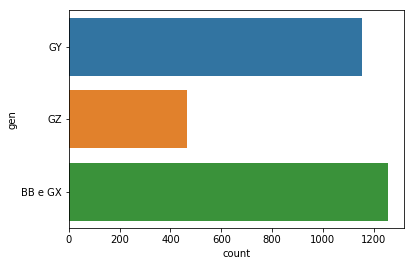

In [285]:
sns.countplot(y='gen',data=final_intervalcriticesp, orient='h')

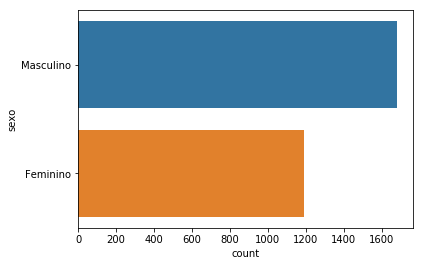

In [286]:
sns.countplot(y='sexo',data=final_intervalcriticesp, orient='h')

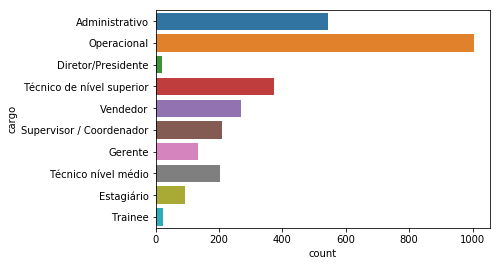

In [287]:
sns.countplot(y='cargo',data=final_intervalcriticesp, orient='h')

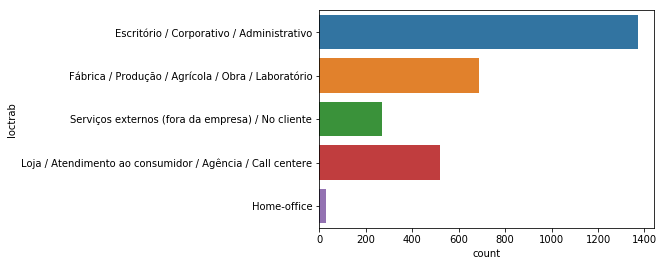

In [288]:
sns.countplot(y='loctrab',data=final_intervalcriticesp, orient='h')

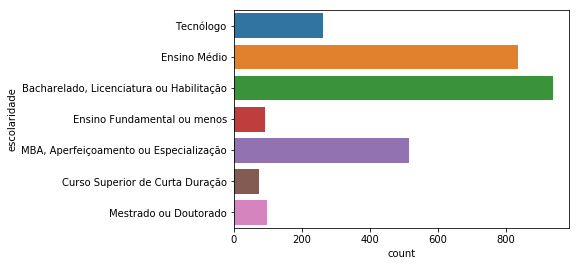

In [289]:
sns.countplot(y='escolaridade',data=final_intervalcriticesp, orient='h')

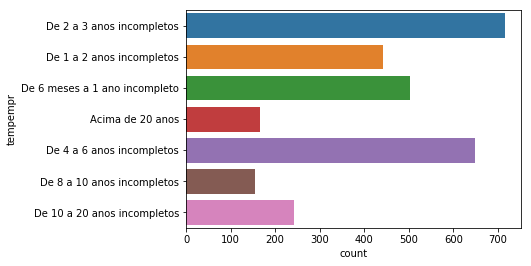

In [290]:
sns.countplot(y='tempempr',data=final_intervalcriticesp, orient='h')

In [305]:
explorat1= final_intervalcriticesp.pivot_table(values= ['meb', 'mci', 'mpa', 'msd', 'mri', 'mgc', 'mpo', 'mqvt', 'medc', 'mlid', 'mrec', 'mestr'], index='gen')
explorat2= final_intervalcriticesp.pivot_table(values= ['meb', 'mci', 'mpa', 'msd', 'mri', 'mgc', 'mpo', 'mqvt', 'medc', 'mlid', 'mrec', 'mestr'], index='sexo')
explorat3= final_intervalcriticesp.pivot_table(values= ['meb', 'mci', 'mpa', 'msd', 'mri', 'mgc', 'mpo', 'mqvt', 'medc', 'mlid', 'mrec', 'mestr'], index='cargo')
explorat4= final_intervalcriticesp.pivot_table(values= ['meb', 'mci', 'mpa', 'msd', 'mri', 'mgc', 'mpo', 'mqvt', 'medc', 'mlid', 'mrec', 'mestr'], index='loctrab')
explorat5= final_intervalcriticesp.pivot_table(values= ['meb', 'mci', 'mpa', 'msd', 'mri', 'mgc', 'mpo', 'mqvt', 'medc', 'mlid', 'mrec', 'mestr'], index='escolaridade')
explorat6= final_intervalcriticesp.pivot_table(values= ['meb', 'mci', 'mpa', 'msd', 'mri', 'mgc', 'mpo', 'mqvt', 'medc', 'mlid', 'mrec', 'mestr'], index='tempempr')

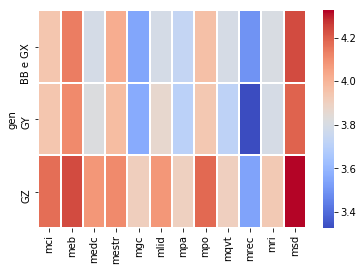

In [304]:
sns.heatmap(explorat1,cmap='coolwarm',linecolor='white',linewidths=1)

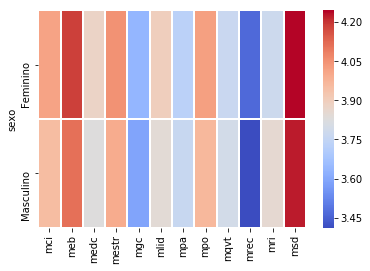

In [303]:
sns.heatmap(explorat2,cmap='coolwarm',linecolor='white',linewidths=1)

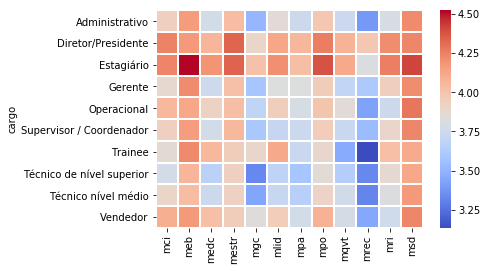

In [302]:
sns.heatmap(explorat3,cmap='coolwarm',linecolor='white',linewidths=1)

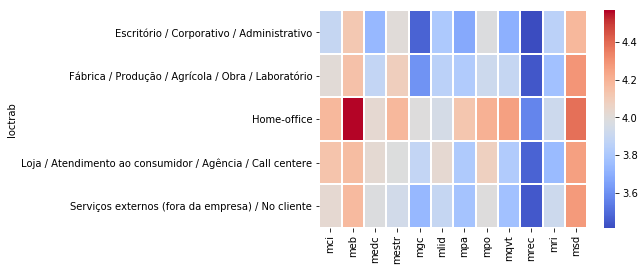

In [301]:
sns.heatmap(explorat4,cmap='coolwarm',linecolor='white',linewidths=1)

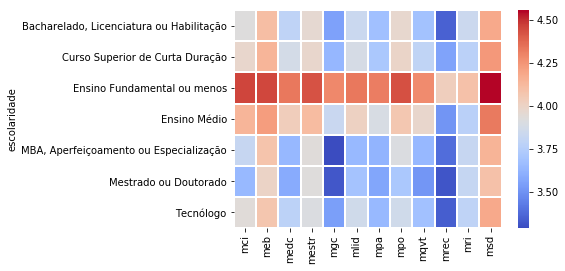

In [300]:
sns.heatmap(explorat5,cmap='coolwarm',linecolor='white',linewidths=1)

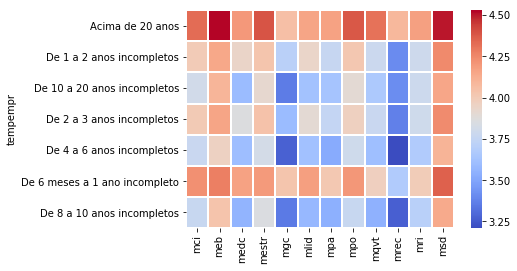

In [299]:
sns.heatmap(explorat6,cmap='coolwarm',linecolor='white',linewidths=1)

In [232]:
forest = ExtraTreesClassifier()
forest.fit(x1_train, y_train)
importanciasarr = forest.feature_importances_

C:\Users\silva\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [234]:
importancias= ['importâncias']
importanciastab= pd.DataFrame(data= importanciasarr, index= x1.columns, columns= importancias).round(3)

In [235]:
importanciastab.sort_values(['importâncias'], ascending= False)

,importâncias
rot_vol,0.106
setor,0.052
rotgeral,0.046
anos de operação no Brasil,0.041
retnaemp,0.038
tempempr,0.035
fxsalarial,0.034
categ_futnaemp,0.034
mlid,0.033
mqvt,0.033


In [236]:
importanciastab.to_excel('importancias.xls', sheet_name= 'sheet1')

In [237]:
final.to_excel('final_tt.xls', sheet_name= 'sheet1')